<a href="https://colab.research.google.com/github/rugadamanikanta/Airbnb-Booking-analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd
% matplotlib inline


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
cdf=df.copy()

In [ ]:
df_brooklyn=cdf[cdf['neighbourhood_group']=='Brooklyn'].reset_index()
df_brooklyn

In [ ]:
df_manhattan=cdf[cdf['neighbourhood_group']=='Manhattan'].reset_index()
df_manhattan

In [ ]:
df_queens=cdf[cdf['neighbourhood_group']=='Queens'].reset_index()
df_queens

In [ ]:
df_staisland=cdf[cdf['neighbourhood_group']=='Staten Island'].reset_index()
df_staisland

In [ ]:
df_bronx=cdf[cdf['neighbourhood_group']=='Bronx'].reset_index()
df_bronx

In [14]:
Host_by_location=cdf.groupby(['neighbourhood_group'])['id'].count()
Host_by_location

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64

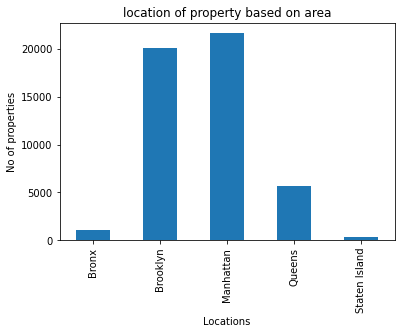

In [15]:
Host_by_location.plot(kind='bar')

plt.title('location of property based on area')
plt.ylabel('No of properties')
plt.xlabel('Locations')

# Set the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (8, 5)

Most of the listing have been take placed at Brooklyn and Manhattan, in queens listing are mid range, but where as in Bronx and staten island has low listing 

In [27]:
price_of_listings=cdf['price']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


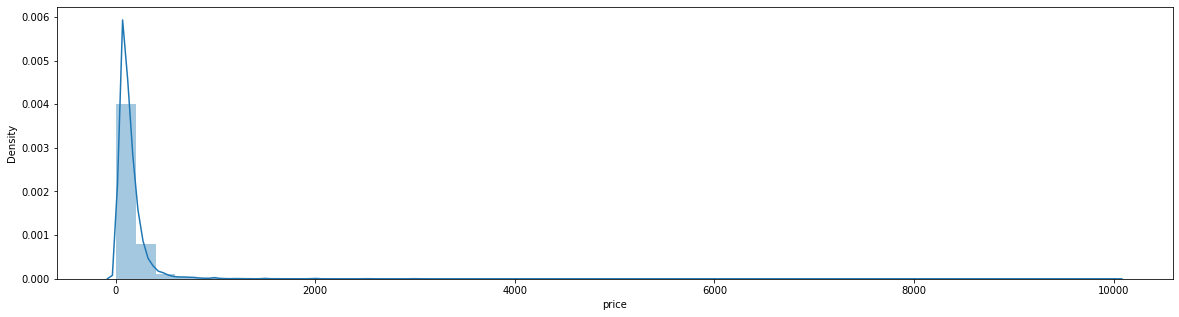

In [30]:
sns.distplot(price_of_listings, hist=True)
plt.rcParams['figure.figsize'] = (20, 5)

In [34]:
Minimum_nights_by_host=df['minimum_nights']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


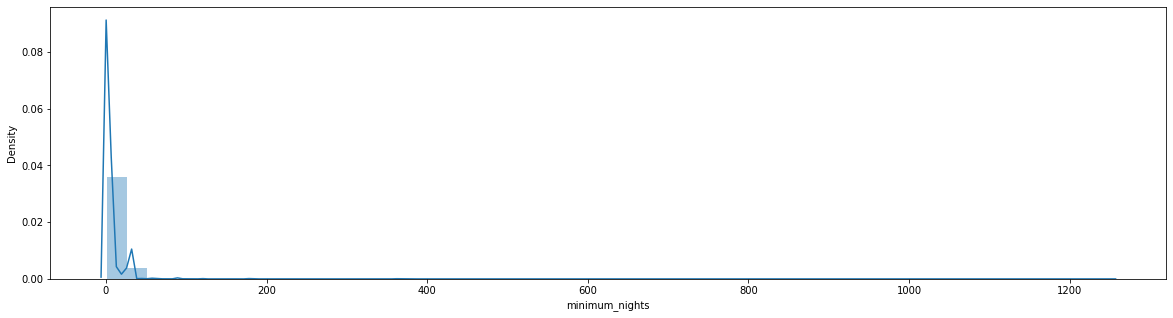

In [37]:
sns.distplot(Minimum_nights_by_host, hist=True)
plt.rcParams['figure.figsize'] = (20, 5)

In [36]:
mulitipul_list_by_host=df['calculated_host_listings_count']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


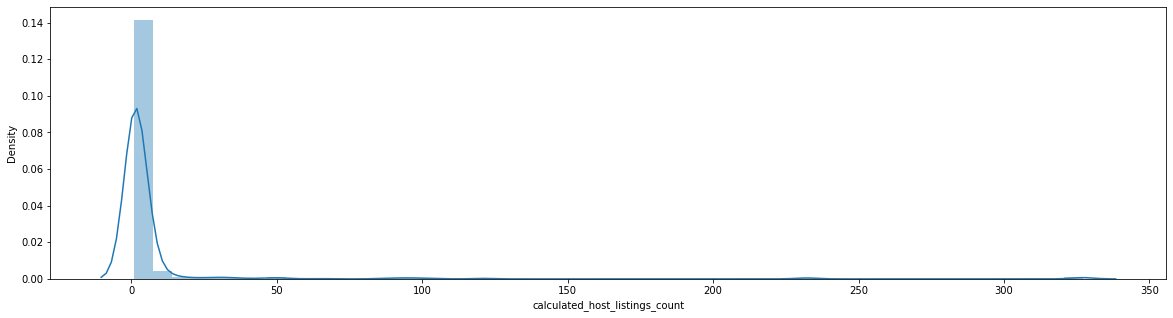

In [38]:
sns.distplot(mulitipul_list_by_host, hist=True)
plt.rcParams['figure.figsize'] = (20, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


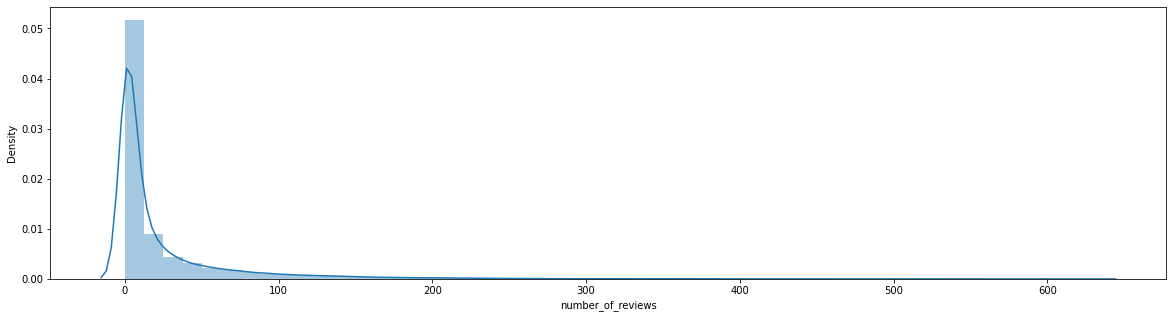

In [41]:
reviews=df['number_of_reviews']
sns.distplot(reviews, hist=True)
plt.rcParams['figure.figsize'] = (20,5)

In [45]:
a=cdf.groupby(['neighbourhood_group','number_of_reviews','price'])['id'].count().unstack()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


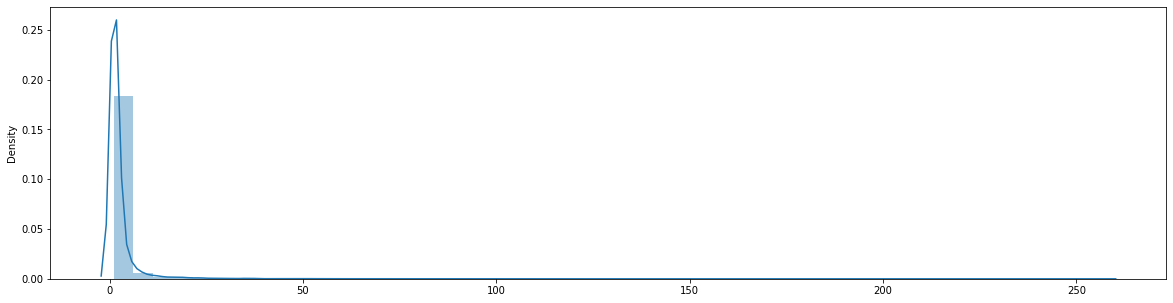

In [31]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [22]:
df_brooklyn['price'].max()

10000

In [19]:
df_manhattan['neighbourhood'].unique()

array(['Midtown', 'Harlem', 'East Harlem', 'Murray Hill',
       "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'West Village',
       'Chelsea', 'Inwood', 'East Village', 'Lower East Side', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Washington Heights',
       'Financial District', 'Morningside Heights', 'NoHo',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'Little Italy', 'Two Bridges', 'Nolita', 'Gramercy',
       'Theater District', 'Tribeca', 'Battery Park City', 'Civic Center',
       'Stuyvesant Town', 'Marble Hill'], dtype=object)

In [20]:
df_queens['neighbourhood'].unique()

array(['Long Island City', 'Woodside', 'Flushing', 'Sunnyside',
       'Ridgewood', 'Jamaica', 'Middle Village', 'Ditmars Steinway',
       'Astoria', 'Queens Village', 'Rockaway Beach', 'Forest Hills',
       'Elmhurst', 'Jackson Heights', 'St. Albans', 'Rego Park',
       'Briarwood', 'Ozone Park', 'East Elmhurst', 'Arverne',
       'Cambria Heights', 'Bayside', 'Kew Gardens', 'College Point',
       'Glendale', 'Richmond Hill', 'Bellerose', 'Maspeth', 'Woodhaven',
       'Kew Gardens Hills', 'Bay Terrace', 'Whitestone', 'Bayswater',
       'Fresh Meadows', 'Springfield Gardens', 'Howard Beach',
       'Belle Harbor', 'Jamaica Estates', 'Far Rockaway',
       'South Ozone Park', 'Corona', 'Neponsit', 'Laurelton',
       'Holliswood', 'Rosedale', 'Edgemere', 'Jamaica Hills', 'Hollis',
       'Douglaston', 'Little Neck', 'Breezy Point'], dtype=object)

In [13]:
list_hostid=df['host_id'].unique()
len(list_hostid)

37457

In [15]:
higest_listing=df[df['calculated_host_listings_count']==df['calculated_host_listings_count'].max()]
higest_listing

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


In [20]:
higest_listing['room_type'].unique()

array(['Entire home/apt', 'Private room'], dtype=object)

In [21]:
higest_listing['price'].max()

699

In [22]:
higest_listing['price'].min()

100

In [10]:
df.groupby(['neighbourhood_group','room_type'])['id'].count().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [11]:
jondf=df[df['host_name']=='John']
jondf[jondf['host_id']==2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


In [18]:
adf=df.copy()

In [ ]:
adf.columns

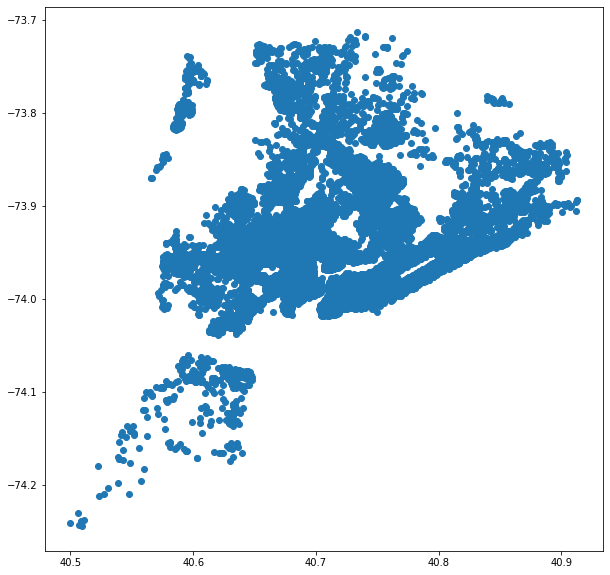

In [31]:
plt.rcParams['figure.figsize'] = (10,10)
plt.scatter(x=adf['latitude'], y=adf['longitude'])
plt.show()

In [ ]:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim()
# loc = geolocator.geocode("New York, NY")
# loc
# # Loc((40.7305991, -73.9865811))

In [ ]:
# from shapely.geometry import Point

In [ ]:
# geometry = [Point(xy) for xy in zip(df['longitude'], df['aatitude'])]
# gdf = GeoDataFrame(df, geometry=geometry)  
# # world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [ ]:
Types_of_rooms=adf.value_counts('room_type')
Types_of_rooms

In [ ]:
room_avaliablity=adf.groupby(['room_type','minimum_nights']).count().unstack()
room_avaliablity

In [ ]:
room=adf.groupby(['minimum_nights','availability_365']).count().unstack()
room

In [ ]:
room_rer=adf.groupby(['minimum_nights','number_of_reviews']).count().unstack()
room_rer

In [ ]:
room_avaliablity.plot()

plt.title('Average daily sales of different property types in the month of July 2018')
plt.ylabel('Number of sales')
plt.xlabel('Date')
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
df.describe()

In [ ]:
adf=df.copy()

In [ ]:
df.describe()

In [ ]:
max_reviews=df[df['number_of_reviews']==df['number_of_reviews'].max()]
max_reviews

In [ ]:
max_reviews_permonth=df[df['reviews_per_month']==df['reviews_per_month'].max()]
max_reviews_permonth